# Analyzing Lyrical Schemes of Popular Music Genres in Sacramento, California




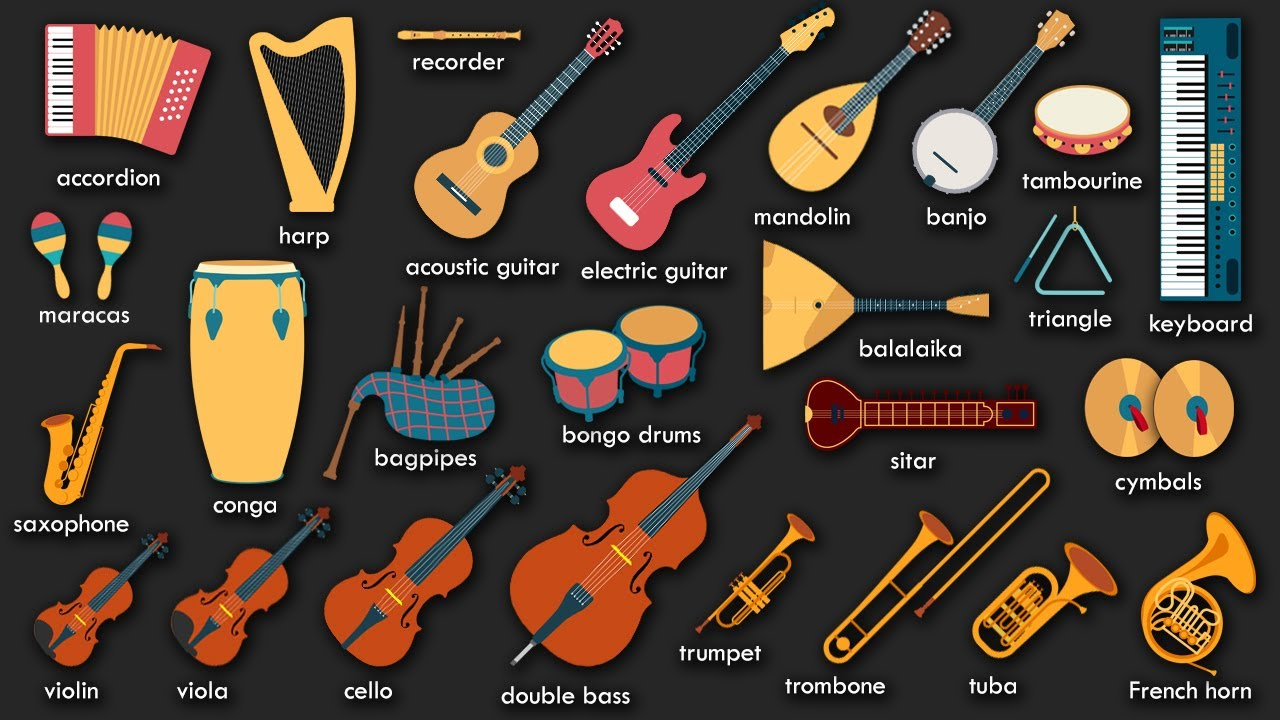

# **Abstract**

For my final project, I have chosen to analyze three different types of music genres most prevalent in my hometown of Sacramento, California, and research the lyrical scheme for each of the genres. I will select the two most popular songs of each genre based on the number of streams on Spotify and the popular music tool feature on Shazam that allows users to view what the most streamed songs of the week are in a specific city and or area around the country. I got inspiration for this project recently when myself and some friends were discussing the many different and unique genres prevalent in Sacramento and what aspects of the songs make them unique, and what common themes are utilized in these diverse genres. The goal of this project is to uncover what makes these genres truly unique. While I do listen to music of different genres, I never give any thought to the deeper layers of the songs and how they might connect to songs of the same genre. These indicators, in turn, are what make different music genres unique and place them in their own distinct category within the music industry. Due to its geographically diverse surroundings, Sacramento is known for its rich and eclectic music scene, representing a microcosm of broader musical trends across the United States. By focusing on this locale, my project aims to highlight how regional influences shape music genres and their lyrical content. This exploration is significant because it provides insight into the cultural, social, and artistic influences that define Sacramento's music scene. Additionally, understanding the common themes and unique elements of these genres can contribute to a broader discussion about music categorization, audience engagement, and the further evolution of musical styles.

# Data Used

The first step to creating the data used for this project is finding the individual songs on Genius and converting the lyrics into text files. This process is necessary so that I can process the provided texts to uncover different themes throughout the three unique genres of music. With that being said the top 3 music genres and accompanying songs in Sacramento are as follows:

**Country**

1. Shaboozey's “A Bar Song(Tipsy)” and 2. Post Malone’s “I Had Some Help” Ft. Morgan Wallen

**Rap**

1. Tommy Richman's “MILLION DOLLAR BABY” and 2. Future's “Like That” Ft. Metro Boomin & Kendrick Lamar

**Pop**

1. Hozier “Too Sweet” and 2. Teddy Swims “Lose Control”

# **Predictions**

This project will explore the rich musical landscape of Sacramento, focusing on three of the current prevalent genres and their lyrical content. With my current knowledge of music I expect that these genres will be dispersed throughout Sacramento and the surrounding areas based on geographical locations. For example, country will be more prevalent in the outskirts of the city in the agricultural predominant areas, due to their ability to relate to the lyrics that are typically used in country songs. Rap will be more prevalent within intercity settings due to the violence and lust for money and women that are typical in big cities and urban centers, thus, revelaing throught the lyrics a good deal of profanity. Finally I expect the Pop genre will be popular in suburbs, with middle class individual and retired communitys due to its catchy toons and easy to follow lyrics.

# **Work Flow**

1. The first step I need to take in this project is finding the lyrics for the songs and turning them into a text file. By doing this, it allows for the following steps to occur. 
2. The next step is to install and import all of the gien libraries that are provided below. 
3. Thirdly, I will attempt to identify a common theme between all 6 of the chosen songs in an attempt to identify common word phrases/rhyme schemes that make these song so popular.
4. Upon approving or disproving is the collection of all six of these songs have a common factors, I will then examine the individual songs as well as the genre groups. 
5. Lastly, with all of the data analyzed I will derive a conclusion of my findings. 

In [ ]:
#Install the following Libraries in order to run this project effectively 
!pip install pandas
!pip install plotly 
!pip install dash 
!pip install geopandas 
!pip install matplotlib 
!pip install scipy 
!pip install wordcloud
!pip install plydavis

In [101]:
#Import the following in order to view visualizations and word counters
from collections import Counter
%matplotlib inline
import nltk 
from nltk.corpus import stopwords
import numpy as np 
import os
import pandas as pd
import re 
import gensim
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

In [102]:
#By using %pwd we can begin by knowing where we are at as users 
%pwd

'C:\\Users\\aidan\\DIGHUM101-2024'

In [ ]:
#Use this command before using the below commands in order for the rest of the project to work properly. 
import shutil

def delete_ipynb_checkpoints(starting_directory):
    """
    Delete all .ipynb_checkpoints directories starting from the given directory.

    :param starting_directory: The root directory to start the search from.
    """
    for root, dirs, files in os.walk(starting_directory):
        for dir_name in dirs:
            if dir_name == '.ipynb_checkpoints':
                dir_path = os.path.join(root, dir_name)
                print(f"Deleting directory: {dir_path}")
                shutil.rmtree(dir_path)

starting_directory = 'C:\\Users\\aidan\\DIGHUM101-2024\\Data'
delete_ipynb_checkpoints(starting_directory)

# **Combined Songs**

Before we look at the individual songs I thought it would be a good idea to look at the common words when we combine all of the songs data together to possibly find a common theme.

In [143]:
#Use this command to view the text files that are within the music_data folder that we will be working with
dir_path = os.listdir("Data/music_data/")
dir_path

['Country_1', 'Country_2', 'Pop_1', 'Pop_2', 'Rap_1', 'Rap_2']

In [104]:
for_dataframe = {}

for file in dir_path:
    with open("Data/music_data/" + file, "r", encoding="utf-8") as to_open:
         for_dataframe[file] = to_open.read()
            
md_1 = (pd.DataFrame.from_dict(for_dataframe, 
                                       orient = "index")
                .reset_index().rename(index = str, 
                                      columns = {"index": "File", 0: "Text"}))

In [147]:
md_1

,File,Text,Text_processed
0,Country_1,"My baby want a Birkin, she's been tellin' me a...",baby want birkin tellin night long gasoline gr...
1,Country_2,"\nYou got a lotta nerve, don't you, baby?\nI o...",got lotta nerve baby hit curb cause made telli...
2,Pop_1,It can't be said I'm an early bird\nIt's 10 o'...,said early bird clock say word baby never tell...
3,Pop_2,"Something's got a hold of me lately\nNo, I don...",something got hold lately know anymore feels l...
4,Rap_1,"I ain't never rep a set, baby (Tsk, tsk)\nI ai...",never rep set baby tsk tsk wrong could clean g...
5,Rap_2,\nGotta fire my joint up on this bitch\nYoung ...,gotta fire joint bitch young metro young metro...


In [106]:
md_1.iloc[0,1][:10000]

'My baby want a Birkin, she\'s been tellin\' me all night long\nGasoline and groceries, the list goes on and on\nThis nine-to-five ain\'t workin\', why the hell do I work so hard?\nI can\'t worry \'bout my problems, I can\'t take \'em when I\'m gone, uh\n\n\nOne, here comes the two to the three to the four\nTell \'em "Bring another round," we need plenty more\nTwo-steppin\' on the table, she don\'t need a dance floor\nOh my, good Lord\n\n\nSomeone pour me up a double shot of whiskey\nThey me and Jack Daniеl\'s got a history\nThere\'s a party downtown near 5th Street\nEvеrybody at the bar gettin\' tipsy\n\n\n\n\nI\'ve been Boozey since I left\nI ain\'t changin\' for a check\nTell my ma, I ain\'t forget ( Lord), I\nWoke up drunk at 10 a.m.\u200b\nWe gon\' do this shit again\nTell your girl to bring a friend,  Lord\n\nOne, here comes the two to the three to the four\nTell \'em "Bring another round," we need plenty more\nTwo-steppin\' on the table, she don\'t need a dance floor\n my, good 

In [107]:
md_1["Text_processed"] = md_1["Text"].apply(gensim.utils.simple_preprocess)

md_1["Text_processed"] 

md_1["Text_processed"] = md_1["Text"].apply(len)

md_1

,File,Text,Text_processed
0,Country_1,"My baby want a Birkin, she's been tellin' me a...",1811
1,Country_2,"\nYou got a lotta nerve, don't you, baby?\nI o...",1478
2,Pop_1,It can't be said I'm an early bird\nIt's 10 o'...,1441
3,Pop_2,"Something's got a hold of me lately\nNo, I don...",1364
4,Rap_1,"I ain't never rep a set, baby (Tsk, tsk)\nI ai...",1517
5,Rap_2,\nGotta fire my joint up on this bitch\nYoung ...,4168


In [108]:
processed = md_1["Text"].apply(gensim.utils.simple_preprocess)

stop = stopwords.words('english')
no_stop = processed.apply(lambda x: [w for w in x if w not in stopwords.words('english')]) 

md_1["Text_processed"] = [' '.join(t) for t in no_stop]

In [13]:
md_1

,File,Text,Text_processed
0,Country_1,"My baby want a Birkin, she's been tellin' me a...",baby want birkin tellin night long gasoline gr...
1,Country_2,"\nYou got a lotta nerve, don't you, baby?\nI o...",got lotta nerve baby hit curb cause made telli...
2,Pop_1,It can't be said I'm an early bird\nIt's 10 o'...,said early bird clock say word baby never tell...
3,Pop_2,"Something's got a hold of me lately\nNo, I don...",something got hold lately know anymore feels l...
4,Rap_1,"I ain't never rep a set, baby (Tsk, tsk)\nI ai...",never rep set baby tsk tsk wrong could clean g...
5,Rap_2,\nGotta fire my joint up on this bitch\nYoung ...,gotta fire joint bitch young metro young metro...


In [14]:
md_1['Text_processed'][0][:1500]

C:\Users\aidan\AppData\Local\Temp\ipykernel_8156\280244901.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  md_1['Text_processed'][0][:1500]


'baby want birkin tellin night long gasoline groceries list goes nine five workin hell work hard worry bout problems take em gone uh one comes two three four tell em bring another round need plenty two steppin table need dance floor oh good lord someone pour double shot whiskey jack daniеl got history party downtown near th street evеrybody bar gettin tipsy boozey since left changin check tell forget lord woke drunk gon shit tell girl bring friend lord one comes two three four tell em bring another round need plenty two steppin table need dance floor good lord someone pour double shot whiskey double shot whiskey jack daniel got history go way back party downtown near th street everybody bar gettin tipsy one comes two three four last call kick us door gettin kind late ladies want good lord tell em drinks someone pour double shot whiskey double shot whiskey jack daniel got history way back party downtown near th street come everybody bar gettin tipsy woo ooh someone pour double shot whis

In [15]:
md_str = ' '.join(md_1['Text_processed'].tolist())
md_tok = md_str.split()
md_freq = Counter(md_tok)

md_df = pd.DataFrame(md_freq.most_common(10), columns = ["Word", "Frequency"])
md_df

,Word,Frequency
0,like,53
1,yeah,32
2,baby,22
3,hell,17
4,know,15
5,got,13
6,help,12
7,nigga,12
8,tell,11
9,whiskey,11


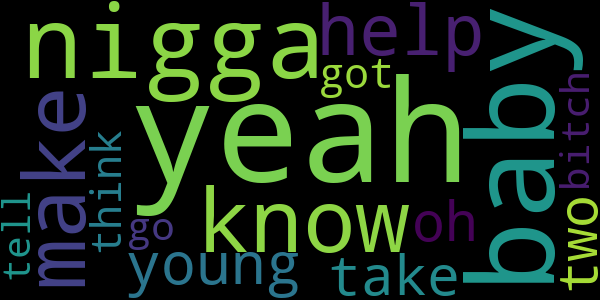

In [17]:
cloud = WordCloud(background_color = "black",
                  max_words = 15,
                  contour_width = 5,
                  width = 600, height = 300,
                  random_state = 4)
cloud.generate(md_str)
cloud.to_image()

In [26]:
bigram_vectorizer = CountVectorizer(ngram_range = (1,2),
                                    stop_words = "english",
                                    token_pattern = r'\b\w+\b' ,
                                    min_df = 1)
bigram_vectorizer

CountVectorizer(ngram_range=(1, 2), stop_words='english',
                token_pattern='\\b\\w+\\b')

In [27]:
analyze = bigram_vectorizer.build_analyzer()
vocab = analyze(md_str)

vocab[0:10]

['baby',
 'want',
 'birkin',
 'tellin',
 'night',
 'long',
 'gasoline',
 'groceries',
 'list',
 'goes']

In [28]:
freq = Counter(vocab)
stop_df = pd.DataFrame(freq.most_common(20), columns = ["Word", "Frequency"])
stop_df

,Word,Frequency
0,like,53
1,yeah,32
2,baby,22
3,hell,17
4,know,15
5,like like,15
6,got,13
7,help,12
8,nigga,12
9,tell,11


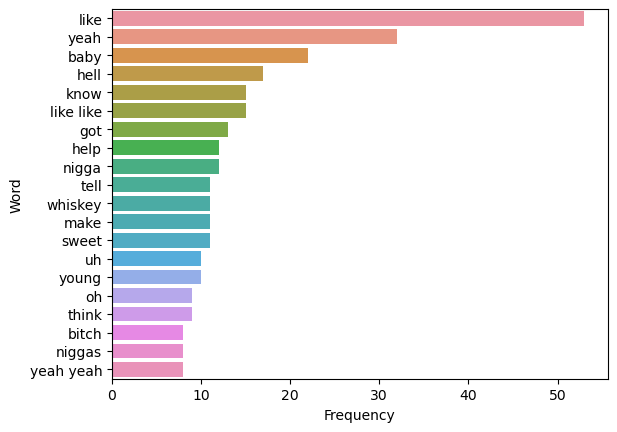

In [29]:
sns.barplot(x = "Frequency",
            y = "Word",
            data = stop_df,
            orient = "h");

# **Individual Song Analysis**

After analyzing the song data combined and finding no clear pattern we will now individual songs and categories in hopes of finding a more coherent pattern or underlying theme for each of the genres provided. 

In [36]:
country1 = open('C:\\Users\\aidan\\DIGHUM101-2024\\Data\\music_data\\Country_1', encoding = 'utf-8').read()
country2 = open('C:\\Users\\aidan\\DIGHUM101-2024\\Data\\music_data\\Country_2', encoding = 'utf-8').read()
rap1 = open('C:\\Users\\aidan\\DIGHUM101-2024\\Data\\music_data\\Rap_1', encoding = 'utf-8').read()
rap2 = open('C:\\Users\\aidan\\DIGHUM101-2024\\Data\\music_data\\Rap_2', encoding = 'utf-8').read()
pop1 = open('C:\\Users\\aidan\\DIGHUM101-2024\\Data\\music_data\\Pop_1', encoding = 'utf-8').read()
pop2 = open('C:\\Users\\aidan\\DIGHUM101-2024\\Data\\music_data\\Pop_1', encoding = 'utf-8').read()

In [42]:
from string import punctuation

In [43]:
#Cleaning the individual songs and tokenizing them
def remove_punctuation(song):
    for char in punctuation:
        song = song.replace(char, "")
    return song

In [44]:
country1 = remove_punctuation(country1)
country2 = remove_punctuation(country2)
rap1 = remove_punctuation(rap1)
rap2 = remove_punctuation(rap2)
pop1 = remove_punctuation(pop1)
pop2 = remove_punctuation(pop2)

In [45]:
def lowercase(song):
    lowercase_song = song.lower()
    return lowercase_song

In [46]:
country1 = lowercase(country1)
country2 = lowercase(country2)
rap1 = lowercase(rap1)
rap2 = lowercase(rap2)
pop1 = lowercase(pop1)
pop2 = lowercase(pop2)

In [47]:
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aidan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aidan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\aidan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [48]:
country1 = word_tokenize(country1)
country2 = word_tokenize(country2)
rap1 = word_tokenize(rap1)
rap2 = word_tokenize(rap2)
pop1 = word_tokenize(pop1)
pop2 = word_tokenize(pop2)

In [56]:
country1
#country2
#rap1
#rap2
#pop1
#pop2

['baby',
 'want',
 'birkin',
 'shes',
 'tellin',
 'night',
 'long',
 'gasoline',
 'groceries',
 'list',
 'goes',
 'ninetofive',
 'aint',
 'workin',
 'hell',
 'work',
 'hard',
 'cant',
 'worry',
 'bout',
 'problems',
 'cant',
 'take',
 'em',
 'im',
 'gone',
 'uh',
 'one',
 'comes',
 'two',
 'three',
 'four',
 'tell',
 'em',
 'bring',
 'another',
 'round',
 'need',
 'plenty',
 'twosteppin',
 'table',
 'dont',
 'need',
 'dance',
 'floor',
 'oh',
 'good',
 'lord',
 'someone',
 'pour',
 'double',
 'shot',
 'whiskey',
 'jack',
 'daniеls',
 'got',
 'history',
 'theres',
 'party',
 'downtown',
 'near',
 '5th',
 'street',
 'evеrybody',
 'bar',
 'gettin',
 'tipsy',
 'ive',
 'boozey',
 'since',
 'left',
 'aint',
 'changin',
 'check',
 'tell',
 'aint',
 'forget',
 'lord',
 'woke',
 'drunk',
 '10',
 'am\u200b',
 'gon',
 'shit',
 'tell',
 'girl',
 'bring',
 'friend',
 'lord',
 'one',
 'comes',
 'two',
 'three',
 'four',
 'tell',
 'em',
 'bring',
 'another',
 'round',
 'need',
 'plenty',
 'twosteppin

In [109]:
#By running this function we are getting rid of stop words as well as additional words that I found to be irrelevant. 
def no_stops(song, additional_stopwords=None):
    english_stopwords = set(stopwords.words('english'))
    additional_stopwords = ["like", "yeah", "got", "help", "tell", "uh", "oh", "know", "make", "ah", "hell", "nah", "im", "go"]
    if additional_stopwords:
        english_stopwords.update(additional_stopwords)
    no_stopwords = [word for word in song if word.lower() not in english_stopwords]
    return no_stopwords

In [110]:
country1 = no_stops(country1)
country2 = no_stops(country2)
rap1 = no_stops(rap1)
rap2 = no_stops(rap2)
pop1 = no_stops(pop1)
pop2 = no_stops(pop2)

In [111]:
#Delete the # before each of the songs to view the edited lyrics
country1
#country2
#rap1
#rap2
#pop1
#pop2

['baby',
 'want',
 'birkin',
 'shes',
 'tellin',
 'night',
 'long',
 'gasoline',
 'groceries',
 'list',
 'goes',
 'ninetofive',
 'aint',
 'workin',
 'work',
 'hard',
 'cant',
 'worry',
 'bout',
 'problems',
 'cant',
 'take',
 'em',
 'gone',
 'one',
 'comes',
 'two',
 'three',
 'four',
 'em',
 'bring',
 'another',
 'round',
 'need',
 'plenty',
 'twosteppin',
 'table',
 'dont',
 'need',
 'dance',
 'floor',
 'good',
 'lord',
 'someone',
 'pour',
 'double',
 'shot',
 'whiskey',
 'jack',
 'daniеls',
 'history',
 'theres',
 'party',
 'downtown',
 'near',
 '5th',
 'street',
 'evеrybody',
 'bar',
 'gettin',
 'tipsy',
 'ive',
 'boozey',
 'since',
 'left',
 'aint',
 'changin',
 'check',
 'aint',
 'forget',
 'lord',
 'woke',
 'drunk',
 '10',
 'am\u200b',
 'gon',
 'shit',
 'girl',
 'bring',
 'friend',
 'lord',
 'one',
 'comes',
 'two',
 'three',
 'four',
 'em',
 'bring',
 'another',
 'round',
 'need',
 'plenty',
 'twosteppin',
 'table',
 'dont',
 'need',
 'dance',
 'floor',
 'good',
 'lord',
 'som

# **Finding Longest Words**

Since I had a complete list of all the words that were not considered stop words, I wanted to narrow down the list to 20 of the longest character words in the song in hopes of finding some significance. I will then place each genres songs next to each other in hopes of finding themes between common words in each song of the respective genres. 

In [140]:
def find_longest_words(file_path):
    try:
        with open(file_path, 'r') as file:
            text = file.read()
            words = text.split()
            words = list(set(words))
            longest_words = sorted(words, key=len, reverse=True)[:20]
            return longest_words
    except FileNotFoundError:
        return "The file was not found."
    except Exception as e:
        return f"An error occurred: {e}"

In [141]:
file_path1 = 'Data/music_data/Country_1'
file_path2 = 'Data/music_data/Country_2'
file_path3 = 'Data/music_data/Rap_1'
file_path4 = 'Data/music_data/Rap_2'
file_path5 = 'Data/music_data/Pop_1'
file_path6 = 'Data/music_data/Pop_2'

longest_words = find_longest_words(file_path1)
print("The longest 20 words for Country 1 is:", longest_words)
longest_words = find_longest_words(file_path2)
print("The longest 20 words for Country 2 is:", longest_words)
longest_words = find_longest_words(file_path3)
print("The longest 20 words for Rap 1 is:", longest_words)
longest_words = find_longest_words(file_path4)
print("The longest 20 words for Rap 2 is:", longest_words)
longest_words = find_longest_words(file_path5)
print("The longest 20 words for Pop 1 is:", longest_words)
longest_words = find_longest_words(file_path6)
print("The longest 20 words for Pop 2 is:", longest_words)

The longest 20 words for Country 1 is: ["Two-steppin'", 'nine-to-five', 'EvÐµrybody', 'groceries,', 'problems,', 'Everybody', '(Woo-ooh)', "DaniÐµl's", 'downtown', 'whiskey)', "workin',", "Daniel's", 'Gasoline', "changin'", 'Someone', "fuckin'", '(Double', 'bottle,', "gettin'", "There's"]
The longest 20 words for Country 2 is: ['heaven-sent', 'a-crumbling', "somethin'", '"Teamwork', "couldn't", 'innocent', "catchin'", 'weekend', 'friends', "tellin'", 'thought', 'Already', "runnin'", 'nerve,', "'round", 'myself', 'angel,', "'cause", 'bottle', 'stones']
The longest 20 words for Rap 1 is: ['happens,', 'friends)', 'changed?', "haven't", '(Better', "Haven't", 'between', 'believe', 'friends', "Queen's", 'million', 'running', 'losing', 'dollar', 'Gambit', "'Cause", 'cannot', 'around', 'energy', 'yeah),']
The longest 20 words for Rap 2 is: ['first-person', 'Twenty-carat', 'championship', 'temperament', 'Motherfuck', 'sentiments', 'thousands,', 'attractive', 'different', 'location?', "snatchin'

# **Country**

In [142]:
longest_words = find_longest_words(file_path1)
print("The longest 20 words for Country 1 is:", longest_words)
longest_words = find_longest_words(file_path2)
print("The longest 20 words for Country 2 is:", longest_words)

The longest 20 words for Country 1 is: ["Two-steppin'", 'nine-to-five', 'EvÐµrybody', 'groceries,', 'problems,', 'Everybody', '(Woo-ooh)', "DaniÐµl's", 'downtown', 'whiskey)', "workin',", "Daniel's", 'Gasoline', "changin'", 'Someone', "fuckin'", '(Double', 'bottle,', "gettin'", "There's"]
The longest 20 words for Country 2 is: ['heaven-sent', 'a-crumbling', "somethin'", '"Teamwork', "couldn't", 'innocent', "catchin'", 'weekend', 'friends', "tellin'", 'thought', 'Already', "runnin'", 'nerve,', "'round", 'myself', 'angel,', "'cause", 'bottle', 'stones']


**Common Country Theme**

After assessing the list created above, I have deduced that the hypothesis that I put forth during the prediction section of the project was accurate. A congruent theme of the 20 most popular words of this data set are centered around traditional country dances, various sorts of liquor, and the common mans lifestyle such as one would live in the farm lands of Sacramento. 

# **Rap**

In [146]:
longest_words = find_longest_words(file_path3)
print("The longest 20 words for Rap 1 is:", longest_words)
longest_words = find_longest_words(file_path4)
print("The longest 20 words for Rap 2 is:", longest_words)

The longest 20 words for Rap 1 is: ['happens,', 'friends)', 'changed?', "haven't", '(Better', "Haven't", 'between', 'believe', 'friends', "Queen's", 'million', 'running', 'losing', 'dollar', 'Gambit', "'Cause", 'cannot', 'around', 'energy', 'yeah),']
The longest 20 words for Rap 2 is: ['first-person', 'Twenty-carat', 'championship', 'temperament', 'Motherfuck', 'sentiments', 'thousands,', 'attractive', 'different', 'location?', "snatchin'", 'interior,', 'pointers', "Stickin'", 'shooters', 'Balencis', 'bipolar,', "slangin'", 'violence', "dissin',"]


**Common Rap Theme**

After analyzing the 20 most common words in both of the provided rap song lyrics, I have concluded that the common theme of these are the idea of "rags to richs". As I had predicted at the begging of the project, rap songs are based around the ideas of winning, money, and violence. Often times coming from lower income family in the intercities, rappers lyrics usually comprise of their childhood and what their life was like prior to becoming sucessful in the music industry, their childhood usually entailed violence and the death of their friends due to that violence. I was also correct to state that because of this violence, these rap songs often times have more profanity, in which these two songs contained their fair share. 

# **Pop**

In [145]:
longest_words = find_longest_words(file_path5)
print("The longest 20 words for Pop 1 is:", longest_words)
longest_words = find_longest_words(file_path6)
print("The longest 20 words for Pop 2 is:", longest_words)

The longest 20 words for Pop 1 is: ['whiskÐµy', 'daylight', 'morning,', "Heaven's", 'forever,', "ground's", "Smellin'", 'bonfire,', 'pretend', "o'clock", 'barrel,', "tellin'", 'sunrise', 'whiskey', 'rather', 'before', 'coffee', 'Pretty', "you're", 'bright']
The longest 20 words for Pop 2 is: ['Problematic', "Something's", 'knockinâ€™', 'full-moon', 'fallinâ€™', "breakin'", 'youâ€™re', "darlin',", '(Mm-hmm)', 'relief,', 'problem', 'through', 'please,', 'control', "fallin'", 'anymore', 'donâ€™t', "tearin'", "closin'", "devil's"]


**Pop Common Theme**

After reviewing the list of words and finding a joint commonality between them, I would say that the lyrics of popular Pop songs focus on very relatable content for everyone. Pop is very easy to understand and requires know previous knowledge of the artist in order to understand what he/she is singing about. This is a extremely clever way of gaining a large fan base and streams, hence the reason why these songs have made the Sacramentos top 2 pop songs of the last couple of weeks. 

# **Implications**

During the durtion of working on this project I ran into many problems while coding that presented substatial challenges and setbacks. The first of these implications that I encountered was with my data cleaning, in that all the stop words were not being deleted when I ran code to do so. I solved this issue by including the words that it was not deleting to the list, allowing action words to truly show what lyrics of these songs were prevalent. After doing this, I then came across an issue with the data of this project itself. After researching this issue on the internet it seemed like a fairly common issue that other coders had before, but using the suggested counter to this issue I was still having problems revolving it. It took me a long time to find a solution to the issue, but I finally did, thus letting my work continue.

# **Conclusion**

While I had a hard time finding any clear and coherent theme between each of the six chosen songs combined, I did find some themes of interest while just analyzing the genres together. Thus, it is safe to say that this project has served its purpose. 
In hindsight, I would definetly change multiple aspects of this project if I were to do it again. For one, I would have wanted to possibly include more visualization but I found it hard because of the fact that this project was centered around words and lyrical schemes and not true statistical data. Another thing that I would fix is the amount of data for this project. At the beggining of this project, I felt as thought six different songs would be enough data to sufficiently satisfy this project, however I did not take into account the deletion of stopwords. Unfortunately for me, these songs' original lyrics before I cleaned them were filled with stop words, leaving behind liminal data to work with. If I were to create this project later on in my Digital Hummanities career I would include around 10-20 songs for each category, insuring that I had plenty of data to work with after the data cleaning section. 